In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Word Embeddings in NLP


Word Embeddings are numeric representations of words in a lower-dimensional space, capturing semantic and syntactic information. They play a vital role in Natural Language Processing (NLP) tasks. This article explores traditional and neural approaches, such as TF-IDF, Word2Vec, and GloVe, offering insights into their advantages and disadvantages. Understanding the importance of pre-trained word embeddings, providing a comprehensive understanding of their applications in various NLP scenarios.

Word Embedding is an approach for representing words and documents. Word Embedding or Word Vector is a numeric vector input that represents a word in a lower-dimensional space. It allows words with similar meanings to have a similar representation.


Need for Word Embedding?
* To reduce dimensionality
* To use a word to predict the words around it.
* Inter-word semantics must be captured.

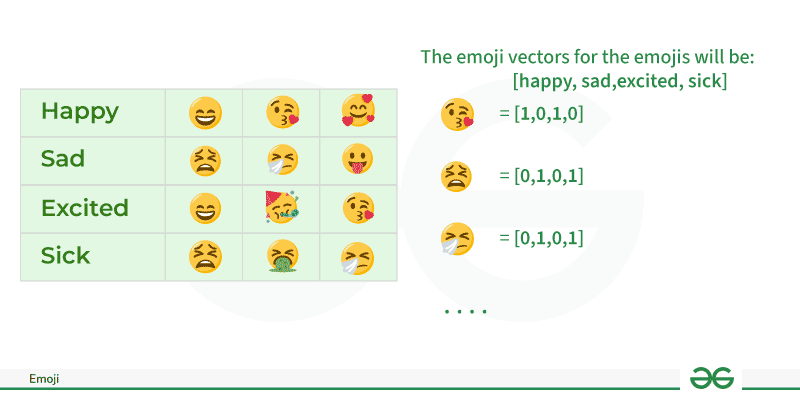

# Approaches for Text Representation


# One-Hot Encoding

In [2]:
def one_hot_encode(text):
	words = text.split()
	vocabulary = set(words)
	word_to_index = {word: i for i, word in enumerate(vocabulary)}
	one_hot_encoded = []
	for word in words:
		one_hot_vector = [0] * len(vocabulary)
		one_hot_vector[word_to_index[word]] = 1
		one_hot_encoded.append(one_hot_vector)

	return one_hot_encoded, word_to_index, vocabulary

# sample
example_text = "cat in the hat dog on the mat bird in the tree"

one_hot_encoded, word_to_index, vocabulary = one_hot_encode(example_text)

print("Vocabulary:", vocabulary)
print("Word to Index Mapping:", word_to_index)
print("One-Hot Encoded Matrix:")
for word, encoding in zip(example_text.split(), one_hot_encoded):
	print(f"{word}: {encoding}")


Vocabulary: {'tree', 'the', 'dog', 'cat', 'hat', 'on', 'in', 'bird', 'mat'}
Word to Index Mapping: {'tree': 0, 'the': 1, 'dog': 2, 'cat': 3, 'hat': 4, 'on': 5, 'in': 6, 'bird': 7, 'mat': 8}
One-Hot Encoded Matrix:
cat: [0, 0, 0, 1, 0, 0, 0, 0, 0]
in: [0, 0, 0, 0, 0, 0, 1, 0, 0]
the: [0, 1, 0, 0, 0, 0, 0, 0, 0]
hat: [0, 0, 0, 0, 1, 0, 0, 0, 0]
dog: [0, 0, 1, 0, 0, 0, 0, 0, 0]
on: [0, 0, 0, 0, 0, 1, 0, 0, 0]
the: [0, 1, 0, 0, 0, 0, 0, 0, 0]
mat: [0, 0, 0, 0, 0, 0, 0, 0, 1]
bird: [0, 0, 0, 0, 0, 0, 0, 1, 0]
in: [0, 0, 0, 0, 0, 0, 1, 0, 0]
the: [0, 1, 0, 0, 0, 0, 0, 0, 0]
tree: [1, 0, 0, 0, 0, 0, 0, 0, 0]


While one-hot encoding is a simple and intuitive method for representing words in NLP, it has several disadvantages, which may limit its effectiveness in certain applications.

* One-hot encoding results in high-dimensional vectors, making it computationally expensive and memory-intensive, especially with large vocabularies.
* It does not capture semantic relationships between words; each word is treated as an isolated entity without considering its meaning or context.
* It is restricted to the vocabulary seen during training, making it unsuitable for handling out-of-vocabulary words.

# Bag of Word (Bow)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
documents = ["This is the first document.",
			"This document is the second document.",
			"And this is the third one.",
			"Is this the first document?"]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

print("Bag-of-Words Matrix:")
print(X.toarray())
print("Vocabulary (Feature Names):", feature_names)


Bag-of-Words Matrix:
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
Vocabulary (Feature Names): ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


While BoW is a simple and interpretable representation, below disadvantages highlight its limitations in capturing certain aspects of language structure and semantics:

* BoW ignores the order of words in the document, leading to a loss of sequential information and context making it less effective for tasks where word order is crucial, such as in natural language understanding.
* BoW representations are often sparse, with many elements being zero resulting in increased memory requirements and computational inefficiency, especially when dealing with large datasets.

# Term frequency-inverse document frequency (TF-IDF)

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample
documents = [
	"The quick brown fox jumps over the lazy dog.",
	"A journey of a thousand miles begins with a single step.",
]

vectorizer = TfidfVectorizer() # Create the TF-IDF vectorizer
tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()
tfidf_values = {}

for doc_index, doc in enumerate(documents):
	feature_index = tfidf_matrix[doc_index, :].nonzero()[1]
	tfidf_doc_values = zip(feature_index, [tfidf_matrix[doc_index, x] for x in feature_index])
	tfidf_values[doc_index] = {feature_names[i]: value for i, value in tfidf_doc_values}
#let's print
for doc_index, values in tfidf_values.items():
	print(f"Document {doc_index + 1}:")
	for word, tfidf_value in values.items():
		print(f"{word}: {tfidf_value}")
	print("\n")


Document 1:
dog: 0.30151134457776363
lazy: 0.30151134457776363
over: 0.30151134457776363
jumps: 0.30151134457776363
fox: 0.30151134457776363
brown: 0.30151134457776363
quick: 0.30151134457776363
the: 0.6030226891555273


Document 2:
step: 0.3535533905932738
single: 0.3535533905932738
with: 0.3535533905932738
begins: 0.3535533905932738
miles: 0.3535533905932738
thousand: 0.3535533905932738
of: 0.3535533905932738
journey: 0.3535533905932738




TF-IDF is a widely used technique in information retrieval and text mining, but its limitations should be considered, especially when dealing with tasks that require a deeper understanding of language semantics. For example:

* TF-IDF treats words as independent entities and doesn’t consider semantic relationships between them. This limitation hinders its ability to capture contextual information and word meanings.
* Sensitivity to Document Length: Longer documents tend to have higher overall term frequencies, potentially biasing TF-IDF towards longer documents.

# Word2Vec

Word2Vec is a neural approach for generating word embeddings. It belongs to the family of neural word embedding techniques and specifically falls under the category of distributed representation models. It is a popular technique in natural language processing (NLP) that is used to represent words as continuous vector spaces. Developed by a team at Google, Word2Vec aims to capture the semantic relationships between words by mapping them to high-dimensional vectors. The underlying idea is that words with similar meanings should have similar vector representations. In Word2Vec every word is assigned a vector. We start with either a random vector or one-hot vector.

There are two neural embedding methods for Word2Vec, Continuous Bag of Words (**CBOW**) and **Skip-gram**.

# Continuous Bag of Words(CBOW)

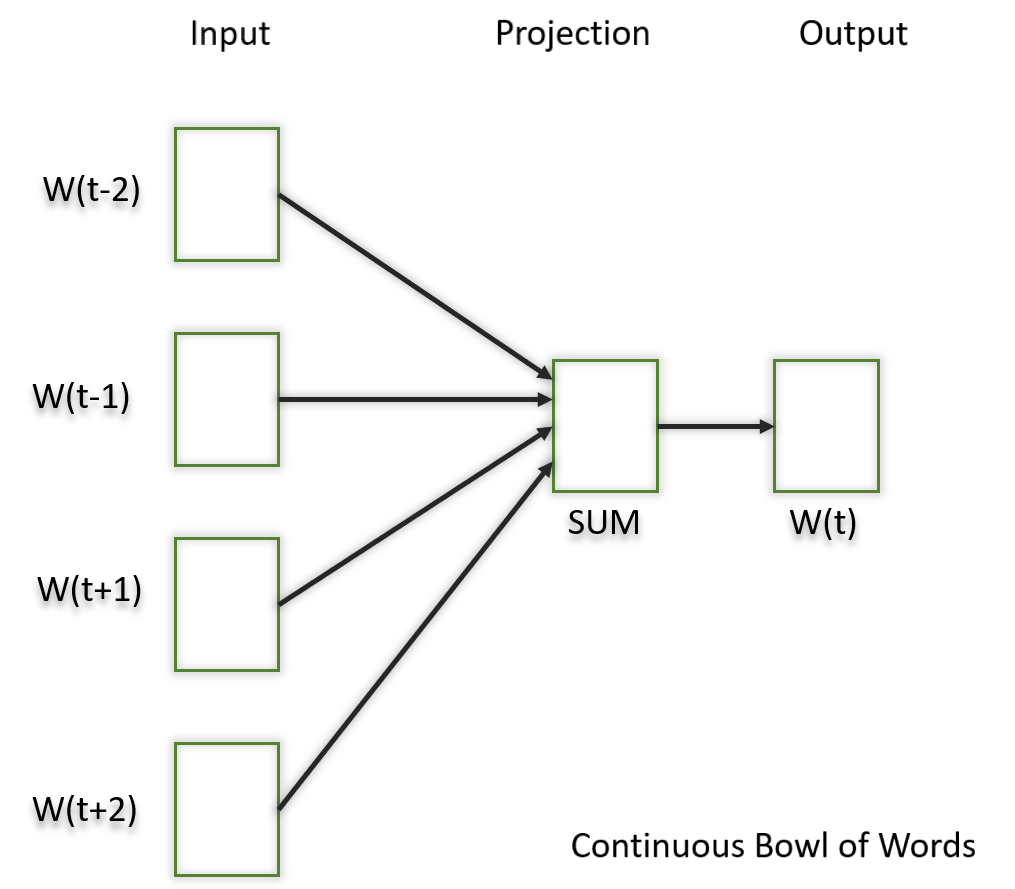


Continuous Bag of Words (CBOW) is a type of neural network architecture used in the Word2Vec model. The primary objective of CBOW is to predict a target word based on its context, which consists of the surrounding words in a given window. Given a sequence of words in a context window, the model is trained to predict the target word at the center of the window.

CBOW is a feedforward neural network with a single hidden layer. The input layer represents the context words, and the output layer represents the target word. The hidden layer contains the learned continuous vector representations (word embeddings) of the input words.

The architecture is useful for learning distributed representations of words in a continuous vector space.

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define CBOW model
class CBOWModel(nn.Module):
	def __init__(self, vocab_size, embed_size):
		super(CBOWModel, self).__init__()
		self.embeddings = nn.Embedding(vocab_size, embed_size)
		self.linear = nn.Linear(embed_size, vocab_size)

	def forward(self, context):
		context_embeds = self.embeddings(context).sum(dim=1)
		output = self.linear(context_embeds)
		return output

# Sample data
context_size = 2
raw_text = "word embeddings are awesome"
tokens = raw_text.split()
vocab = set(tokens)
word_to_index = {word: i for i, word in enumerate(vocab)}
data = []
for i in range(2, len(tokens) - 2):
	context = [word_to_index[word] for word in tokens[i - 2:i] + tokens[i + 1:i + 3]]
	target = word_to_index[tokens[i]]
	data.append((torch.tensor(context), torch.tensor(target)))

# Hyperparameters
vocab_size = len(vocab)
embed_size = 10
learning_rate = 0.01
epochs = 100

# Initialize CBOW model
cbow_model = CBOWModel(vocab_size, embed_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cbow_model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
	total_loss = 0
	for context, target in data:
		optimizer.zero_grad()
		output = cbow_model(context)
		loss = criterion(output.unsqueeze(0), target.unsqueeze(0))
		loss.backward()
		optimizer.step()
		total_loss += loss.item()
	print(f"Epoch {epoch + 1}, Loss: {total_loss}")

# Example usage: Get embedding for a specific word
word_to_lookup = "embeddings"
word_index = word_to_index[word_to_lookup]
embedding = cbow_model.embeddings(torch.tensor([word_index]))
print(f"Embedding for '{word_to_lookup}': {embedding.detach().numpy()}")


Epoch 1, Loss: 0
Epoch 2, Loss: 0
Epoch 3, Loss: 0
Epoch 4, Loss: 0
Epoch 5, Loss: 0
Epoch 6, Loss: 0
Epoch 7, Loss: 0
Epoch 8, Loss: 0
Epoch 9, Loss: 0
Epoch 10, Loss: 0
Epoch 11, Loss: 0
Epoch 12, Loss: 0
Epoch 13, Loss: 0
Epoch 14, Loss: 0
Epoch 15, Loss: 0
Epoch 16, Loss: 0
Epoch 17, Loss: 0
Epoch 18, Loss: 0
Epoch 19, Loss: 0
Epoch 20, Loss: 0
Epoch 21, Loss: 0
Epoch 22, Loss: 0
Epoch 23, Loss: 0
Epoch 24, Loss: 0
Epoch 25, Loss: 0
Epoch 26, Loss: 0
Epoch 27, Loss: 0
Epoch 28, Loss: 0
Epoch 29, Loss: 0
Epoch 30, Loss: 0
Epoch 31, Loss: 0
Epoch 32, Loss: 0
Epoch 33, Loss: 0
Epoch 34, Loss: 0
Epoch 35, Loss: 0
Epoch 36, Loss: 0
Epoch 37, Loss: 0
Epoch 38, Loss: 0
Epoch 39, Loss: 0
Epoch 40, Loss: 0
Epoch 41, Loss: 0
Epoch 42, Loss: 0
Epoch 43, Loss: 0
Epoch 44, Loss: 0
Epoch 45, Loss: 0
Epoch 46, Loss: 0
Epoch 47, Loss: 0
Epoch 48, Loss: 0
Epoch 49, Loss: 0
Epoch 50, Loss: 0
Epoch 51, Loss: 0
Epoch 52, Loss: 0
Epoch 53, Loss: 0
Epoch 54, Loss: 0
Epoch 55, Loss: 0
Epoch 56, Loss: 0
E

#  Skip-Gram
The Skip-Gram model learns distributed representations of words in a continuous vector space. The main objective of Skip-Gram is to predict context words (words surrounding a target word) given a target word. This is the opposite of the Continuous Bag of Words (CBOW) model, where the objective is to predict the target word based on its context. It is shown that this method produces more meaningful embeddings.

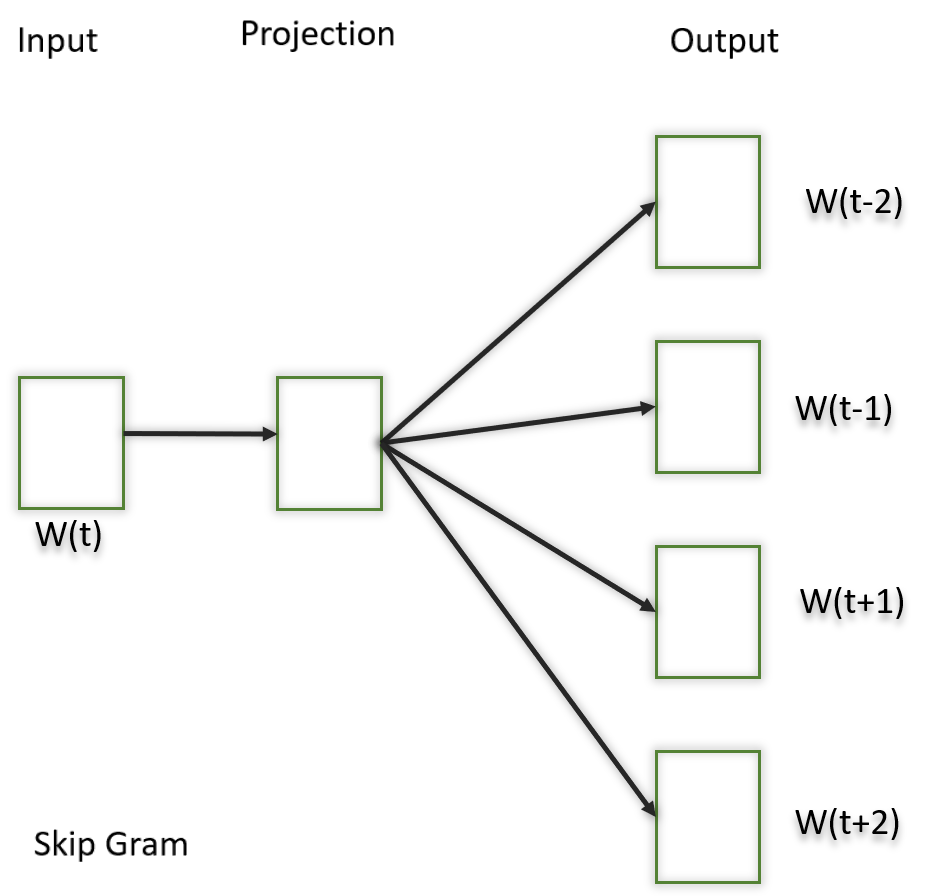

In [7]:
!pip install gensim -q 
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt') # Download the tokenizer models if not already downloaded

sample = "Word embeddings are dense vector representations of words."
tokenized_corpus = word_tokenize(sample.lower()) # Lowercasing for consistency

skipgram_model = Word2Vec(sentences=[tokenized_corpus],
						vector_size=100, # Dimensionality of the word vectors
						window=5,		 # Maximum distance between the current and predicted word within a sentence
						sg=1,			 # Skip-Gram model (1 for Skip-Gram, 0 for CBOW)
						min_count=1,	 # Ignores all words with a total frequency lower than this
						workers=4)	 # Number of CPU cores to use for training the model

# Training
skipgram_model.train([tokenized_corpus], total_examples=1, epochs=10)
skipgram_model.save("skipgram_model.model")
loaded_model = Word2Vec.load("skipgram_model.model")
vector_representation = loaded_model.wv['word']
print("Vector representation of 'word':", vector_representation)


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Vector representation of 'word': [-9.5800208e-03  8.9437785e-03  4.1664648e-03  9.2367809e-03
  6.6457358e-03  2.9233587e-03  9.8055992e-03 -4.4231843e-03
 -6.8048164e-03  4.2256550e-03  3.7299085e-03 -5.6668529e-03
  9.7035142e-03 -3.5551414e-03  9.5499391e-03  8.3657773e-04
 -6.3355025e-03 -1.9741615e-03 -7.3781307e-03 -2.9811086e-03
  1.0425397e-03  9.4814906e-03  9.3598543e-03 -6.5986011e-03
  3.4773252e-03  2.2767992e-03 -2.4910474e-03 -9.2290826e-03
  1.0267317e-03 -8.1645092e-03  6.3240929e-03 -5.8001447e-03
  5.5353874e-03  9.8330071e-03 -1.5987856e-04  4.5296676e-03
 -1.8086446e-03  7.3613892e-03  3.9419360e-03 -9.0095028e-03
 -2.3953868e-03  3.6261671e-03 -1.0080514e-04 -1.2024897e-03
 -1.0558038e-03 -1.6681013e-03  6.0541567e-04  4.1633579e-03
 -4.2531900e-03 -3.8336846e-03 -5.0755290e-05  2.6549282e-04
 -1.7014991e-04 -4.7843382e-03  4.3120929e-03 -2.1710952e-

 # Pretrained Word-Embedding

# GloVe
GloVe is trained on global word co-occurrence statistics. It leverages the global context to create word embeddings that reflect the overall meaning of words based on their co-occurrence probabilities. this method, we take the corpus and iterate through it and get the co-occurrence of each word with other words in the corpus. We get a co-occurrence matrix through this. The words which occur next to each other get a value of 1, if they are one word apart then 1/2, if two words apart then 1/3 and so on.

In [11]:
import gensim.downloader as api

info = api.info()  # show info about available models/datasets
model = api.load("glove-twitter-25")  # download the model and return as object ready for use
model.most_similar("cat")

"""
output:

[(u'dog', 0.9590819478034973),
 (u'monkey', 0.9203578233718872),
 (u'bear', 0.9143137335777283),
 (u'pet', 0.9108031392097473),
 (u'girl', 0.8880630135536194),
 (u'horse', 0.8872727155685425),
 (u'kitty', 0.8870542049407959),
 (u'puppy', 0.886769711971283),
 (u'hot', 0.8865255117416382),
 (u'lady', 0.8845518827438354)]

"""

[==================================================] 100.0% 104.8/104.8MB downloaded


"\noutput:\n\n[(u'dog', 0.9590819478034973),\n (u'monkey', 0.9203578233718872),\n (u'bear', 0.9143137335777283),\n (u'pet', 0.9108031392097473),\n (u'girl', 0.8880630135536194),\n (u'horse', 0.8872727155685425),\n (u'kitty', 0.8870542049407959),\n (u'puppy', 0.886769711971283),\n (u'hot', 0.8865255117416382),\n (u'lady', 0.8845518827438354)]\n\n"

In [13]:
model.most_similar("cat")

[('dog', 0.9590820074081421),
 ('monkey', 0.920357882976532),
 ('bear', 0.9143136739730835),
 ('pet', 0.9108031392097473),
 ('girl', 0.8880629539489746),
 ('horse', 0.8872726559638977),
 ('kitty', 0.8870542049407959),
 ('puppy', 0.886769711971283),
 ('hot', 0.886525571346283),
 ('lady', 0.8845519423484802)]

#  Fasttext
Developed by Facebook, FastText extends Word2Vec by representing words as bags of character n-grams. This approach is particularly useful for handling out-of-vocabulary words and capturing morphological variations.

In [14]:
import gensim.downloader as api
fasttext_model = api.load("fasttext-wiki-news-subwords-300") ## Load the pre-trained fastText model
# Define word pairs to compute similarity for
word_pairs = [('learn', 'learning'), ('india', 'indian'), ('fame', 'famous')]

# Compute similarity for each pair of words
for pair in word_pairs:
	similarity = fasttext_model.similarity(pair[0], pair[1])
	print(f"Similarity between '{pair[0]}' and '{pair[1]}' using FastText: {similarity:.3f}")


Similarity between 'learn' and 'learning' using FastText: 0.642
Similarity between 'india' and 'indian' using FastText: 0.708
Similarity between 'fame' and 'famous' using FastText: 0.519


# BERT (Bidirectional Encoder Representations from Transformers)
BERT is a transformer-based model that learns contextualized embeddings for words. It considers the entire context of a word by considering both left and right contexts, resulting in embeddings that capture rich contextual information.

In [15]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

word_pairs = [('learn', 'learning'), ('india', 'indian'), ('fame', 'famous')]

# Compute similarity for each pair of words
for pair in word_pairs:
	tokens = tokenizer(pair, return_tensors='pt')
	with torch.no_grad():
		outputs = model(**tokens)
	
	# Extract embeddings for the [CLS] token
	cls_embedding = outputs.last_hidden_state[:, 0, :]

	similarity = torch.nn.functional.cosine_similarity(cls_embedding[0], cls_embedding[1], dim=0)
	
	print(f"Similarity between '{pair[0]}' and '{pair[1]}' using BERT: {similarity:.3f}")


Similarity between 'learn' and 'learning' using BERT: 0.930
Similarity between 'india' and 'indian' using BERT: 0.957
Similarity between 'fame' and 'famous' using BERT: 0.956
